In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from six import StringIO
import six
import sys
import seaborn as sn

df = pd.read_csv("/Users/leakrivaa/Downloads/DataMining-main-4/Preprocessing/clean_data_v1.csv")
#df = pd.read_csv("/Users/leakrivaa/Downloads/DataMining-main-4/Analysis/clean_data_v2.csv", sep=',', header=0)

In [2]:
df['class_innocent'] = 0

In [3]:
df

,index,date,year,manner_of_death,armed,age,gender,race,city,state,state_ID,signs_of_mental_illness,threat_level,flee,flee_encoded,body_camera,longitude,latitude,class_innocent
0,0,2015-01-02,2015,0,1,53,1,0,Shelton,WA,47,True,attack,Not fleeing,0,False,-123.122,47.247,0
1,1,2015-01-02,2015,0,1,47,1,5,Aloha,OR,37,False,attack,Not fleeing,0,False,-122.892,45.487,0
2,2,2015-01-03,2015,1,0,23,1,2,Wichita,KS,16,False,other,Not fleeing,0,False,-97.281,37.695,0
3,3,2015-01-04,2015,0,1,32,1,5,San Francisco,CA,4,True,attack,Not fleeing,0,False,-122.422,37.763,0
4,4,2015-01-04,2015,0,1,39,1,2,Evans,CO,5,False,attack,Not fleeing,0,False,-104.692,40.384,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,5615,2020-09-04,2020,0,1,33,1,1,Syracuse,NY,34,False,other,Not fleeing,0,True,-76.148,43.053,0
5028,5616,2020-09-04,2020,0,1,38,1,5,Lucerne,CA,4,False,attack,Not fleeing,0,False,-116.832,34.438,0
5029,5617,2020-09-05,2020,0,1,22,1,5,Battle Creek,MI,22,False,attack,Car,1,False,-85.272,42.305,0
5030,5618,2020-09-05,2020,0,1,61,1,1,San Antonio,TX,43,False,attack,Not fleeing,0,False,Not fleeing,Not fleeing,0


<AxesSubplot:>

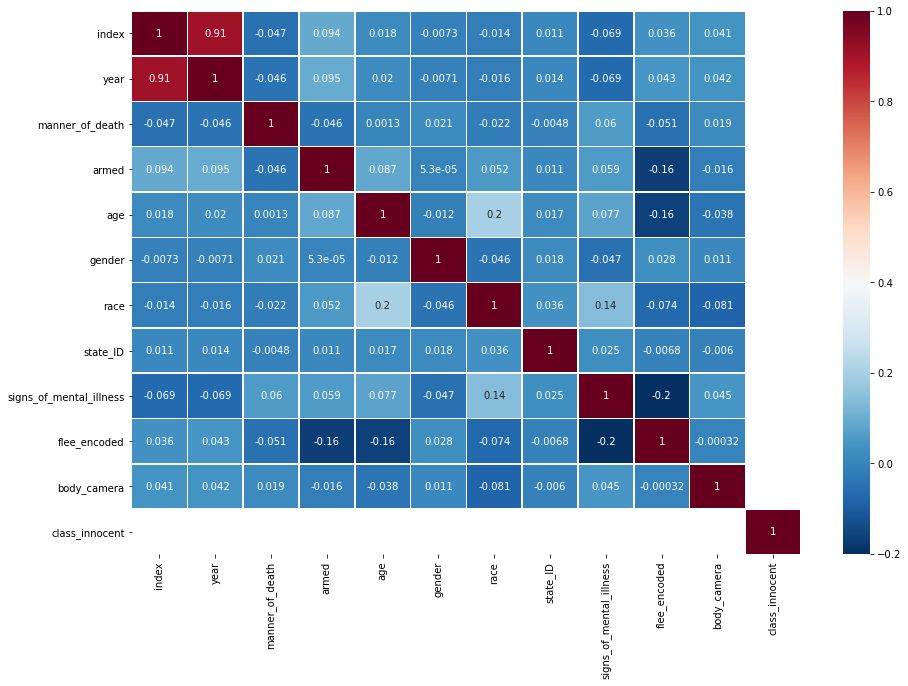

In [4]:
#Create heatMap
corr = df.corr(method='kendall')
#Pearson - Visual heatmap
fig, ax = plt.subplots(figsize=(15,10)) #for size of figure
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

In [5]:
cor_target = abs(corr["flee_encoded"]) #target variable
relevant_features = cor_target[cor_target>0.1]
relevant_features

armed                      0.164547
age                        0.163153
signs_of_mental_illness    0.201184
flee_encoded               1.000000
Name: flee_encoded, dtype: float64

In [6]:
df.describe()

,index,year,manner_of_death,armed,age,gender,race,state_ID,flee_encoded,class_innocent
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.0
mean,2684.650835,2017.255962,0.050676,0.889905,36.572138,0.953100,3.255962,22.253975,0.330485,0.0
std,1600.370338,1.626915,0.219356,0.313040,12.657796,0.211445,1.839101,15.867303,0.470434,0.0
min,0.000000,2015.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1290.750000,2016.000000,0.000000,1.000000,27.000000,1.000000,1.000000,5.000000,0.000000,0.0
50%,2625.500000,2017.000000,0.000000,1.000000,35.000000,1.000000,5.000000,20.000000,0.000000,0.0
75%,4051.250000,2019.000000,0.000000,1.000000,45.000000,1.000000,5.000000,37.000000,1.000000,0.0
max,5623.000000,2020.000000,1.000000,1.000000,91.000000,1.000000,5.000000,50.000000,1.000000,0.0


In [7]:
#How to classify 

In [8]:
#split dataset in features and target variable
#feature_cols = df[['armed_encoded', 'threatLevel_encoded', 'flee_encocded']]
feature_cols = ['armed', 'signs_of_mental_illness']

X = df[feature_cols]

y = df['flee_encoded'] # Target variable

In [9]:
#split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test


In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7189672293942403


In [ ]:
#pip install graphviz

In [ ]:
#pip install pydotplus

In [ ]:
#pip install six

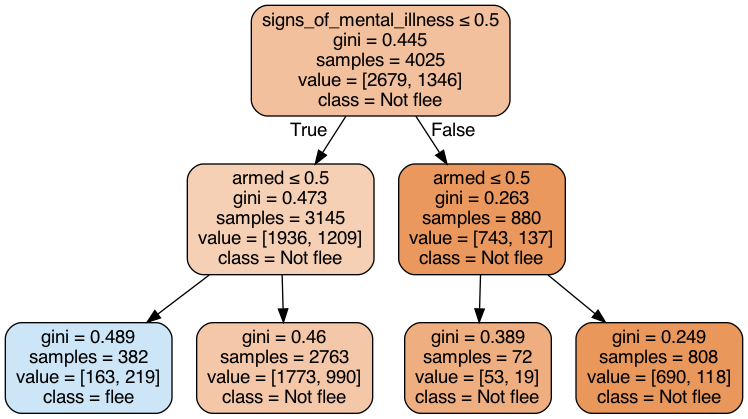

In [12]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

sys.modules['sklearn.externals.six'] = six

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Not flee','flee'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [ ]:
from sklearn.model_selection import GridSearchCV
for cv in range(3,10):
    cv_grid = GridSearchCV(pipeline, param_grid=params,cv=cv)
    cv_grid.fit(X_train, y_train)
    print("%d fold score: %3.2f" %(cv,cv_grid.score(X_test, y_test)))
    print("Best parameters: ", cv_grid.best_params_)
view raw

In [ ]:
#decision tree classifier
df = df.drop(['city','state','armed','year','date','index','flee','state_ID','threat_level'], axis=1)

In [ ]:
x = df.drop('flee_encoded', axis=1)
Y = df['flee_encoded']

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20)


In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, Y_train)

In [ ]:
Y_pred = classifier.predict(x_test)
Y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
#for decisiontree regression
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, Y_train)

In [ ]:
Y_pred = regressor.predict(x_test)


In [ ]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

In [ ]:
df.tail()